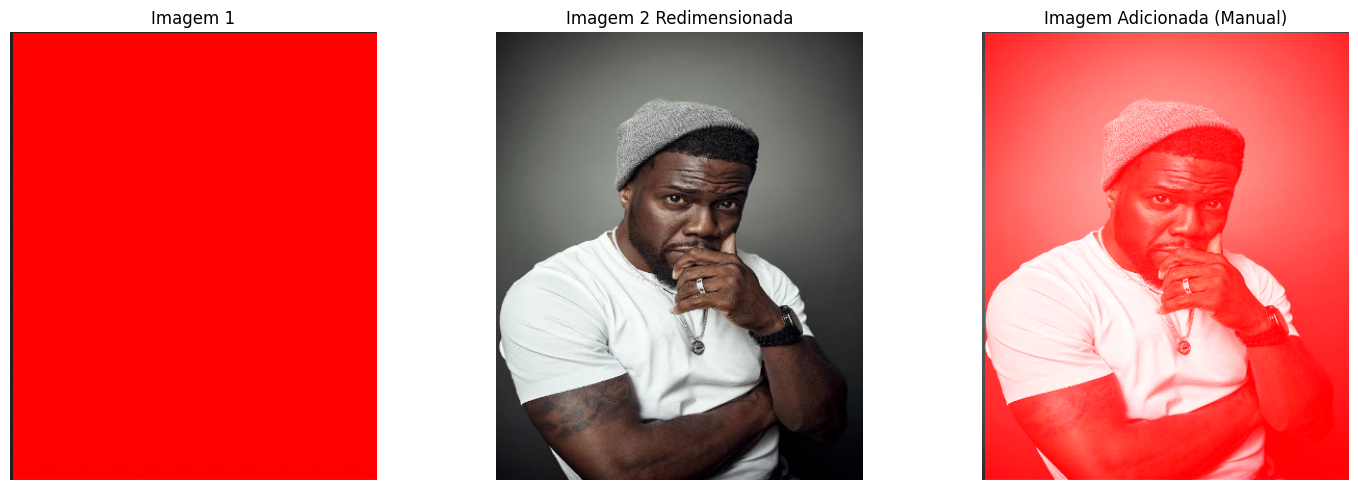

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Função para redimensionar a imagem para corresponder ao tamanho da outra
def redimensionar_imagem(imagem, tamanho):
    return cv2.resize(imagem, (tamanho[1], tamanho[0]))

# Função para somar duas imagens manualmente
def somar_imagens_manual(imagem1, imagem2):
    # Verifique se as duas imagens têm o mesmo tamanho
    if imagem1.shape != imagem2.shape:
        raise ValueError("As imagens devem ter o mesmo tamanho para a soma.")

    # Crie uma nova matriz de zeros com o mesmo tamanho da imagem
    imagem_soma = np.zeros_like(imagem1)

    # Percorra cada pixel da imagem e faça a soma
    for i in range(imagem1.shape[0]):  # Linhas
        for j in range(imagem1.shape[1]):  # Colunas
            for k in range(imagem1.shape[2]):  # Canais de cor (RGB)
                # Some os valores dos pixels correspondentes e limite o valor a 255
                imagem_soma[i, j, k] = min(int(imagem1[i, j, k]) + int(imagem2[i, j, k]), 255)

    return imagem_soma

# Carregue as imagens
imagem1 = cv2.imread('imgs/red.png')
imagem2 = cv2.imread('imgs/kevin_hart_colorido.jpg')

# Verifique se as imagens foram carregadas corretamente
if imagem1 is None or imagem2 is None:
    raise ValueError("Uma ou ambas as imagens não foram carregadas corretamente. Verifique os caminhos.")

# Converta as imagens de BGR para RGB (OpenCV usa BGR por padrão, enquanto o Matplotlib usa RGB)
imagem1_rgb = cv2.cvtColor(imagem1, cv2.COLOR_BGR2RGB)
imagem2_rgb = cv2.cvtColor(imagem2, cv2.COLOR_BGR2RGB)

# Obtenha as dimensões das imagens
altura1, largura1 = imagem1_rgb.shape[:2]

# Redimensione a segunda imagem para o tamanho da primeira imagem
imagem2_redimensionada = redimensionar_imagem(imagem2_rgb, (altura1, largura1))

# Some as imagens manualmente
imagem_adicionada_manual = somar_imagens_manual(imagem1_rgb, imagem2_redimensionada)

# Salve a imagem adicionada localmente
cv2.imwrite('imgs/imagem_adicionada_manual.jpg', cv2.cvtColor(imagem_adicionada_manual, cv2.COLOR_RGB2BGR))

# Configurações de exibição
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Exiba a imagem 1
axes[0].imshow(imagem1_rgb)
axes[0].set_title('Imagem 1')
axes[0].axis('off')

# Exiba a imagem 2 redimensionada
axes[1].imshow(imagem2_redimensionada)
axes[1].set_title('Imagem 2 Redimensionada')
axes[1].axis('off')

# Exiba a imagem resultante da soma manual
axes[2].imshow(imagem_adicionada_manual)
axes[2].set_title('Imagem Adicionada (Manual)')
axes[2].axis('off')

# Exiba o gráfico
plt.tight_layout()
plt.show()


# SUBTRAÇÃO

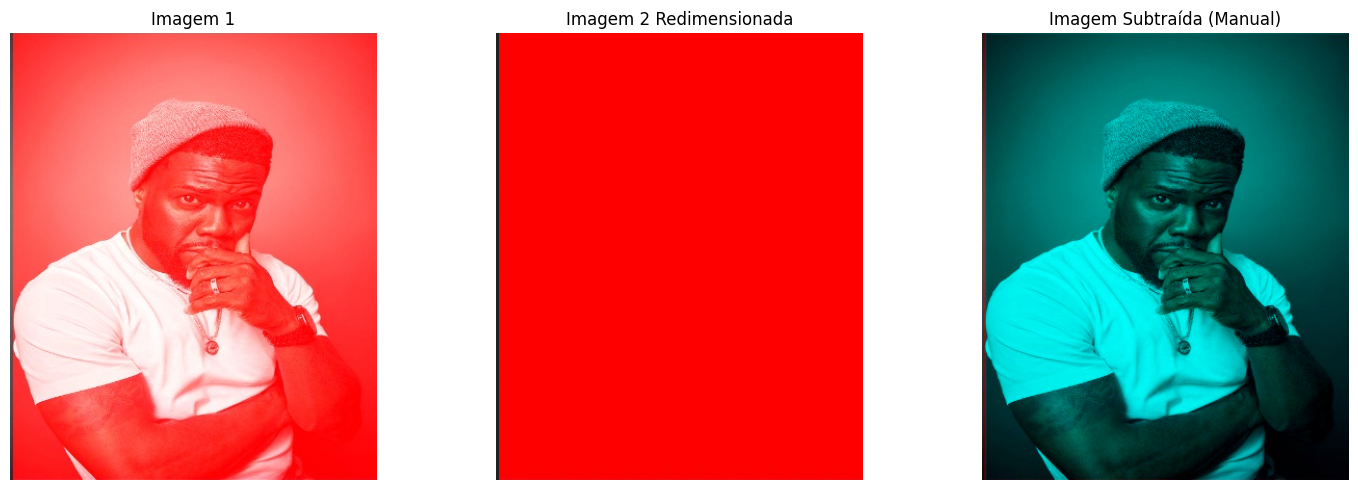

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Função para redimensionar a imagem para corresponder ao tamanho da outra
def redimensionar_imagem(imagem, tamanho):
    return cv2.resize(imagem, (tamanho[1], tamanho[0]))

# Função para subtrair duas imagens manualmente
def subtrair_imagens_manual(imagem1, imagem2):
    # Verifique se as duas imagens têm o mesmo tamanho
    if imagem1.shape != imagem2.shape:
        raise ValueError("As imagens devem ter o mesmo tamanho para a subtração.")

    # Crie uma nova matriz de zeros com o mesmo tamanho da imagem
    imagem_subtraida = np.zeros_like(imagem1)

    # Percorra cada pixel da imagem e faça a subtração
    for i in range(imagem1.shape[0]):  # Linhas
        for j in range(imagem1.shape[1]):  # Colunas
            for k in range(imagem1.shape[2]):  # Canais de cor (RGB)
                # Subtraia os valores dos pixels correspondentes e limite o valor a no mínimo 0
                imagem_subtraida[i, j, k] = max(int(imagem1[i, j, k]) - int(imagem2[i, j, k]), 0)

    return imagem_subtraida

# Carregue as imagens
imagem1 = cv2.imread('imgs/imagem_adicionada_manual.jpg')
imagem2 = cv2.imread('imgs/red.png')

# Verifique se as imagens foram carregadas corretamente
if imagem1 is None or imagem2 is None:
    raise ValueError("Uma ou ambas as imagens não foram carregadas corretamente. Verifique os caminhos.")

# Converta as imagens de BGR para RGB (OpenCV usa BGR por padrão, enquanto o Matplotlib usa RGB)
imagem1_rgb = cv2.cvtColor(imagem1, cv2.COLOR_BGR2RGB)
imagem2_rgb = cv2.cvtColor(imagem2, cv2.COLOR_BGR2RGB)

# Obtenha as dimensões das imagens
altura1, largura1 = imagem1_rgb.shape[:2]

# Redimensione a segunda imagem para o tamanho da primeira imagem
imagem2_redimensionada = redimensionar_imagem(imagem2_rgb, (altura1, largura1))

# Subtraia as imagens manualmente
imagem_subtraida_manual = subtrair_imagens_manual(imagem1_rgb, imagem2_redimensionada)

# Salve a imagem subtraída localmente
cv2.imwrite('imgs/imagem_subtraida_manual.jpg', cv2.cvtColor(imagem_subtraida_manual, cv2.COLOR_RGB2BGR))

# Configurações de exibição
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Exiba a imagem 1
axes[0].imshow(imagem1_rgb)
axes[0].set_title('Imagem 1')
axes[0].axis('off')

# Exiba a imagem 2 redimensionada
axes[1].imshow(imagem2_redimensionada)
axes[1].set_title('Imagem 2 Redimensionada')
axes[1].axis('off')

# Exiba a imagem resultante da subtração manual
axes[2].imshow(imagem_subtraida_manual)
axes[2].set_title('Imagem Subtraída (Manual)')
axes[2].axis('off')

# Exiba o gráfico
plt.tight_layout()
plt.show()


# Espelhamento ou Reflexão

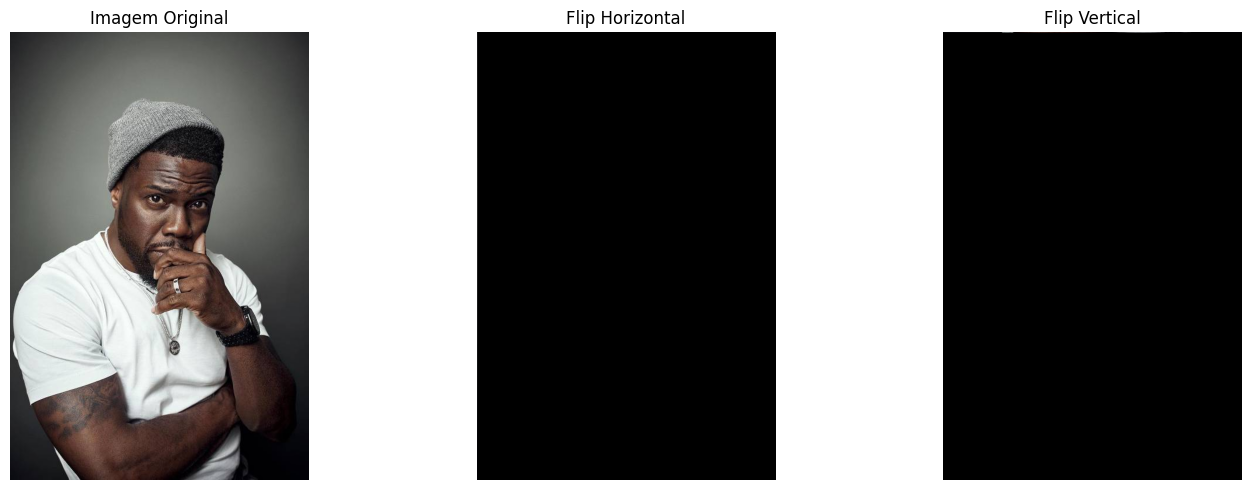

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Função para transformar coordenadas usando matriz de transformação
def transform_coordinates(x, y, transformation_matrix, width, height):
    # Adiciona o termo homogêneo [x, y, 1] para a multiplicação da matriz
    coords = np.array([x, y, 1])
    # Aplica a matriz de transformação
    transformed_coords = transformation_matrix @ coords
    # Remove o termo homogêneo e retorna as coordenadas transformadas
    x_new, y_new = transformed_coords[:2]
    # Garante que as coordenadas fiquem dentro dos limites da imagem
    x_new = int(np.clip(x_new, 0, width - 1))
    y_new = int(np.clip(y_new, 0, height - 1))
    return x_new, y_new

# Função para realizar o espelhamento horizontal manualmente
def flip_horizontal_manual(image):
    rows, cols, channels = image.shape # rows = 0,1,2 e columns = 0,1,2
    flipped_image = np.zeros_like(image)

    # Matriz de transformação para flip horizontal
    transform_matrix = np.array([
        [-1, 0, cols - 1],  # Inversão na direção horizontal
        [0, 1, 0],          # Mantém a direção vertical
        [0, 0, 1]           # Termo homogêneo
    ])

    # Percorre cada pixel e aplica a transformação
    for r in range(rows):
        for c in range(cols):
            new_col, new_row = transform_coordinates(c, r, transform_matrix, cols, rows)
            flipped_image[new_row, new_col] = image[r, c]

    return flipped_image

# Função para realizar o espelhamento vertical manualmente
def flip_vertical_manual(image):
    rows, cols, channels = image.shape
    flipped_image = np.zeros_like(image)

    # Matriz de transformação para flip vertical
    transform_matrix = np.array([
        [1, 0, 0],          # Mantém a direção horizontal
        [0, -1, rows - 1],  # Inversão na direção vertical
        [0, 0, 1]           # Termo homogêneo
    ])

    # Percorre cada pixel e aplica a transformação
    for r in range(rows):
        for c in range(cols):
            new_col, new_row = transform_coordinates(c, r, transform_matrix, cols, rows)
            flipped_image[new_row, new_col] = image[r, c]

    return flipped_image

# Função para exibir as imagens (original, flip horizontal, flip vertical)
def show_images(original, horizontal_flip, vertical_flip):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    for ax in axes:
        ax.axis('off')  # Remove os eixos das imagens

    # Exibir imagem original
    axes[0].imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Imagem Original')

    # Exibir imagem com flip horizontal
    axes[1].imshow(cv2.cvtColor(horizontal_flip, cv2.COLOR_BGR2RGB))
    axes[1].set_title('Flip Horizontal')

    # Exibir imagem com flip vertical
    axes[2].imshow(cv2.cvtColor(vertical_flip, cv2.COLOR_BGR2RGB))
    axes[2].set_title('Flip Vertical')

    plt.tight_layout()
    plt.show()

# Função principal para carregar a imagem e aplicar os flips
def main():
    image_path = 'imgs/kevin_hart_colorido.jpg'  # Substitua pelo caminho da sua imagem
    image = cv2.imread(image_path)

    # Verifica se a imagem foi carregada corretamente
    if image is None:
        print("Erro ao carregar a imagem. Verifique o caminho.")
        return

    # Realiza o flip horizontal e vertical manualmente
    horizontal_flip = flip_horizontal_manual(image)
    vertical_flip = flip_vertical_manual(image)

    # Exibe as imagens resultantes
    show_images(image, horizontal_flip, vertical_flip)

# Executa o código principal
if __name__ == '__main__':
    main()
